In [218]:
from sklearn import datasets
import numpy as np
iris = datasets.load_iris()

X = iris.data[:, [2,3]]
print((X.shape))
print(iris.DESCR)
y = iris.target

(150, 2)
Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values

In [181]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
print(sc.mean_)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

[ 3.82857143  1.22666667]


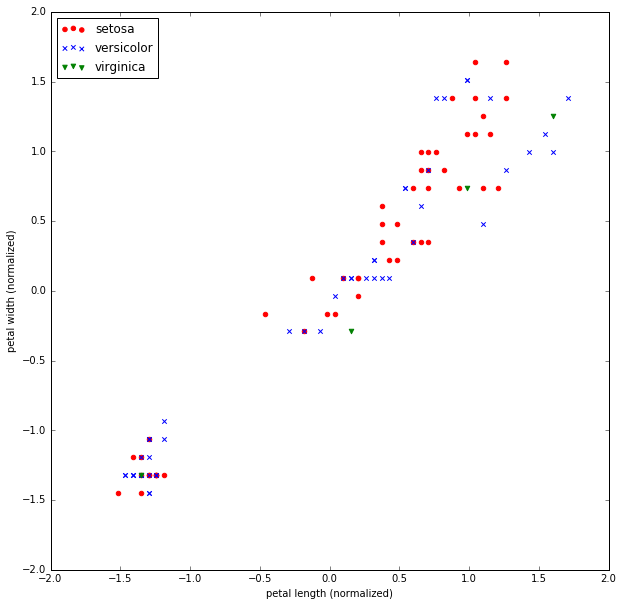

In [182]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10,10))
plt.scatter(X_train_std[0:50, 0], X_train_std[0:50, 1],  color='red', marker='o', label='setosa')
plt.scatter(X_train_std[51:100, 0], X_train_std[51:100, 1],  color='blue', marker='x', label='versicolor')
plt.scatter(X_train_std[101:150, 0], X_train_std[101:150, 1],  color='green', marker='v', label='virginica')
plt.xlabel('petal length (normalized)')
plt.ylabel('petal width (normalized)')
plt.legend(loc='upper left')
plt.show()

In [183]:
from sklearn.linear_model import Perceptron
ppn = Perceptron(n_iter=40, eta0=0.1, random_state=0)
ppn.fit(X_train_std, y_train)
y_pred = ppn.predict(X_test_std)
print("Misclassified samples: %s" % (y_test != y_pred).sum())

from sklearn.metrics import accuracy_score
print("Accuracy %s" % accuracy_score(y_test, y_pred))

Misclassified samples: 4
Accuracy 0.911111111111


In [184]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02, features=(0, 1)):
    f0, f1 = features
    markers = ('s', 'x', 'v', '^', 'o')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    x1_min, x1_max = X[:, f0].min() - 1, X[:, f0].max() +1
    x2_min, x2_max = X[:, f1].min() - 1, X[:, f1].max() +1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, f0], y=X[y == cl, f1],
                   alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl)
        
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, f0], X_test[:, 1], c='', alpha=1.0, linewidth=1, marker='o', s=55, label='test set')

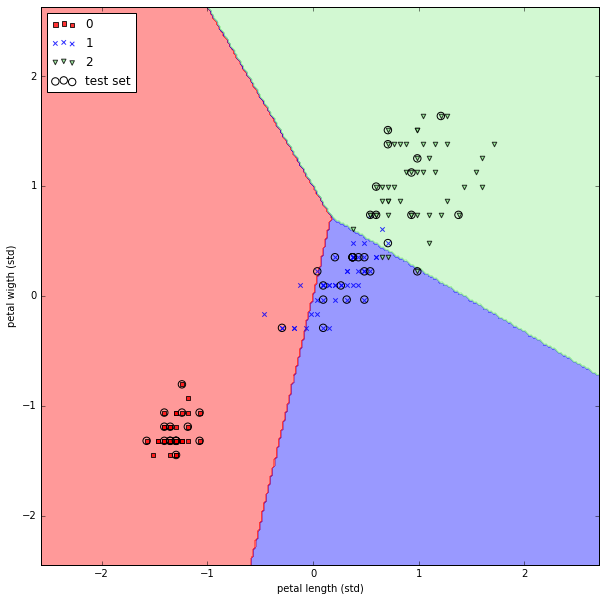

Accuracy on training set: 0.904761904762
Accuracy on test set: 0.911111111111


In [185]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined_std = np.hstack((y_train, y_test))
def show_decision_boundary_iris(classifier):
    plt.figure(figsize=(10,10))
    plot_decision_regions(X=X_combined_std, y=y_combined_std, classifier=classifier, test_idx=range(105,150))
    plt.xlabel('petal length (std)')
    plt.ylabel('petal wigth (std)')
    plt.legend(loc='upper left')
    plt.show()
    
    print ("Accuracy on training set: %s" % accuracy_score(y_train, classifier.predict(X_train_std)))
    print ("Accuracy on test set: %s" % accuracy_score(y_test, classifier.predict(X_test_std)))
    
show_decision_boundary_iris(ppn)

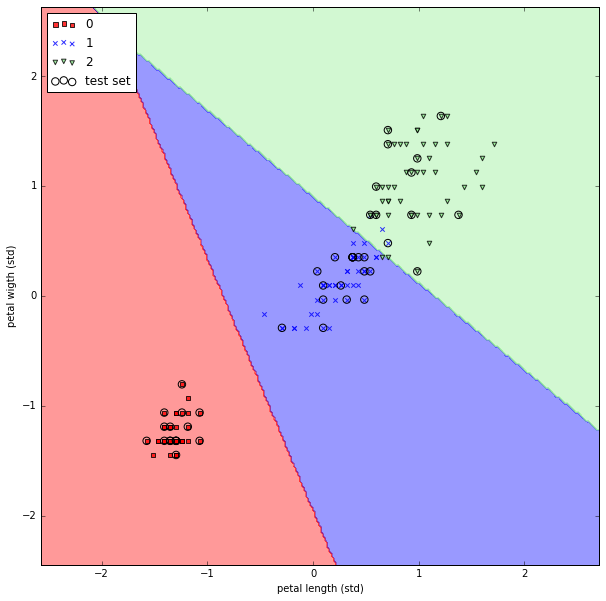

Accuracy on training set: 0.961904761905
Accuracy on test set: 0.977777777778


In [186]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=1000.0, random_state=0)
lr.fit(X_train_std, y_train)
show_decision_boundary_iris(lr)

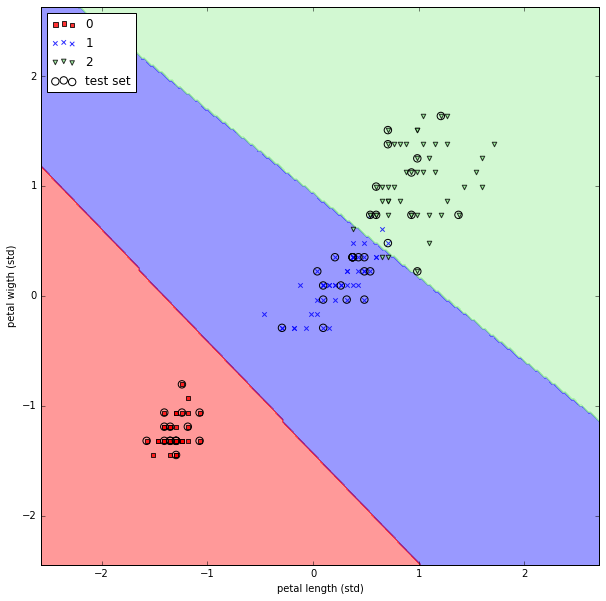

Accuracy on training set: 0.952380952381
Accuracy on test set: 0.977777777778


In [187]:
from sklearn.svm import SVC
svm = SVC(kernel='linear', C=1.0, random_state=0)
svm.fit(X_train_std, y_train)

show_decision_boundary_iris(svm)

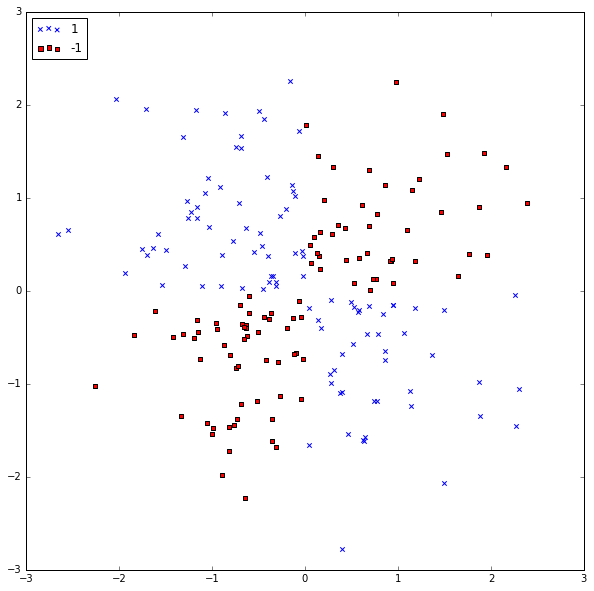

In [188]:
np.random.seed(0)
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0, X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, -1)

plt.figure(figsize=(10,10))
plt.scatter(X_xor[y_xor==1, 0], X_xor[y_xor==1, 1], c='b', marker='x', label='1')
plt.scatter(X_xor[y_xor==-1, 0], X_xor[y_xor==-1, 1], c='r', marker='s', label='-1')
plt.ylim(-3.0)
plt.legend(loc='upper left')
plt.show()

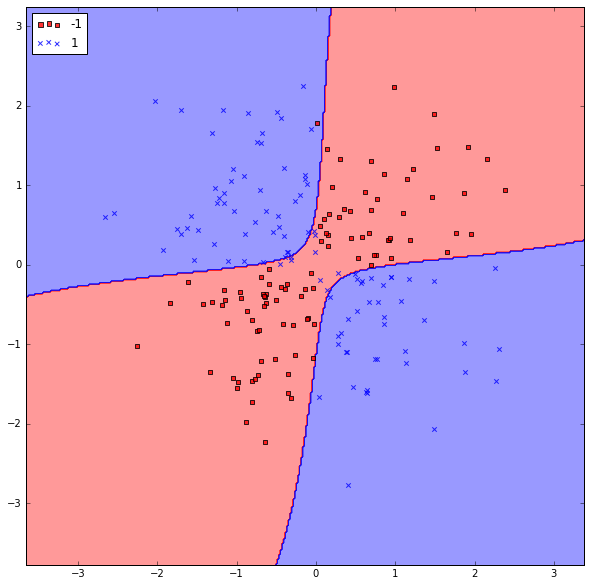

0.95


In [189]:
svm = SVC(kernel='rbf', random_state=0, gamma=0.1, C=10.0)
svm.fit(X_xor, y_xor)
plt.figure(figsize=(10,10))
plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.legend(loc='upper left')
plt.show()
print(accuracy_score(y_xor, svm.predict(X_xor)))

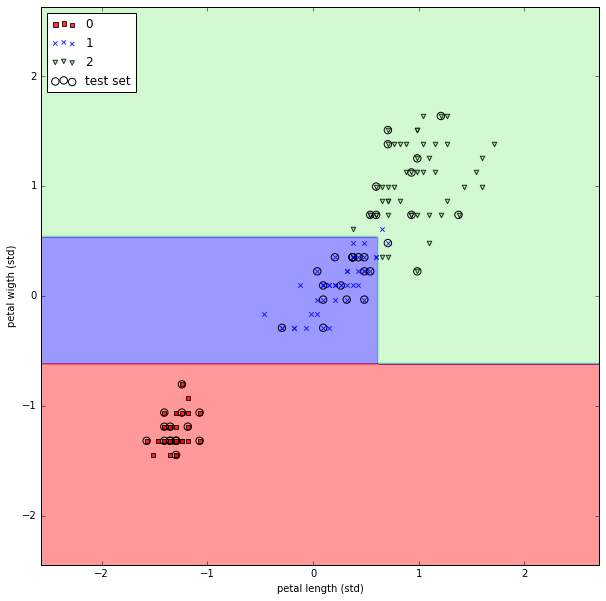

Accuracy on training set: 0.980952380952
Accuracy on test set: 0.977777777778


In [199]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
tree.fit(X_train_std, y_train)
show_decision_boundary_iris(tree)

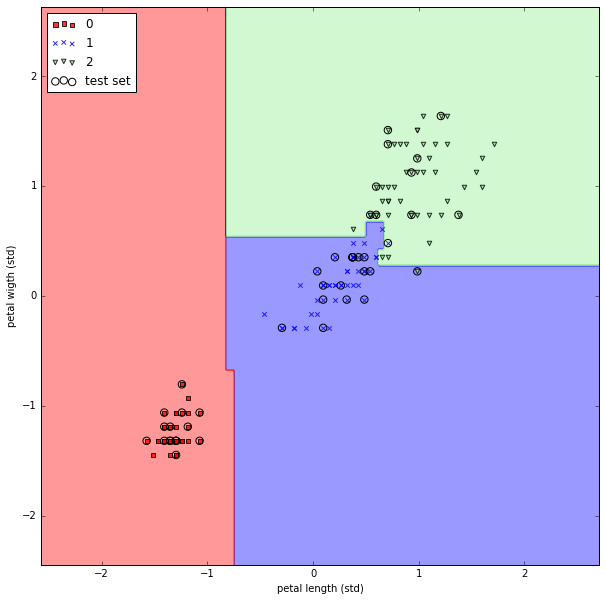

Accuracy on training set: 0.990476190476
Accuracy on test set: 0.955555555556


In [206]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=1, n_jobs=2)
forest.fit(X_train_std, y_train)
show_decision_boundary_iris(forest)

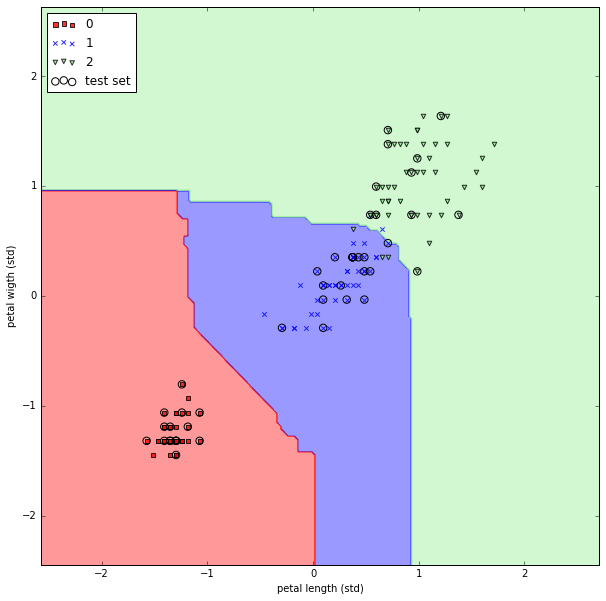

Accuracy on training set: 0.952380952381
Accuracy on test set: 1.0


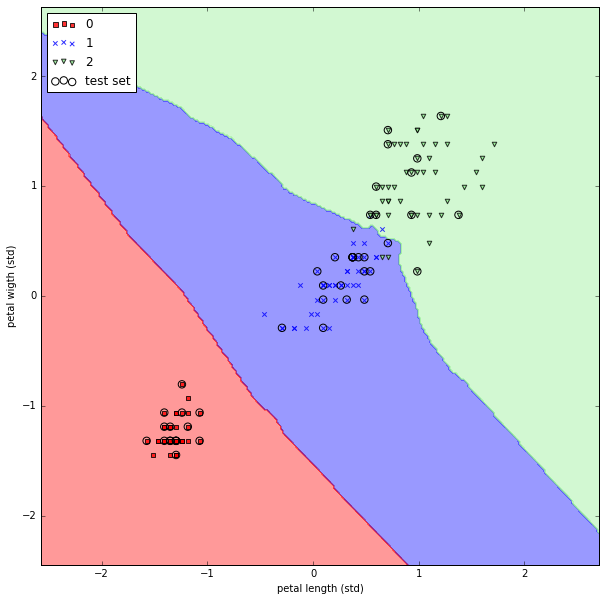

Accuracy on training set: 0.952380952381
Accuracy on test set: 1.0


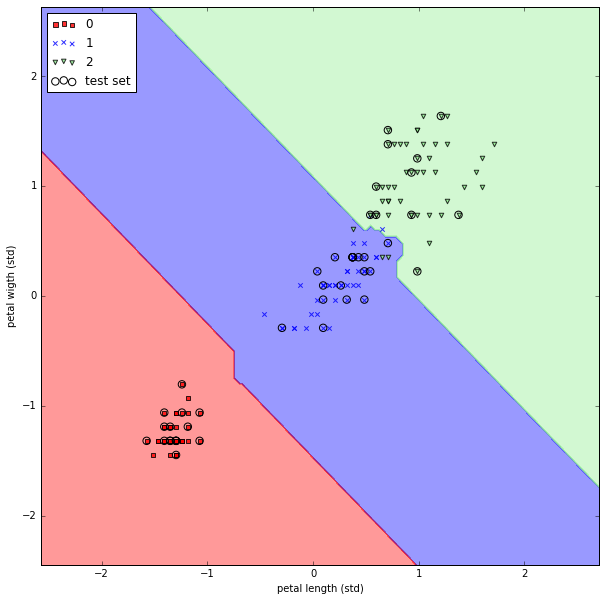

Accuracy on training set: 0.952380952381
Accuracy on test set: 1.0


In [212]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, p=1, metric='minkowski')
knn.fit(X_train_std, y_train)
show_decision_boundary_iris(knn)

knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
knn.fit(X_train_std, y_train)
show_decision_boundary_iris(knn)

knn = KNeighborsClassifier(n_neighbors=5, metric='chebyshev')
knn.fit(X_train_std, y_train)
show_decision_boundary_iris(knn)